In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Constants 
E = 25.00e6  # Young's modulus in Pa (25 MPa)
nu = 0.45  # Poisson ratio
n_L = 1.00  # Number of layers
C_f = 1.00  # Correction factor

# Variables
pressure_values = np.linspace(0, 100, 101) * 1e3  # Pressure values from 10 to 150 kPa in Pascals

#n_W = 8 # Number of corrugations
corrugation_numbers = [2,4,6,8,10]

#s = 1.00e-3  # Wall thickness in meters (1.6 mm)
wall_thicknesses = [1.6,1,1.5,2,2.5] 
wall_thicknesses = [x * 1e-3 for x in wall_thicknesses] 

#h = 4.00e-3  # Corrugation height in meters (4 mm)
corrugation_heights = [8.9,4,6,8,10] 
corrugation_heights = [x * 1e-3 for x in corrugation_heights] 

#DM = 30.00e-3  # Mean diameter in meters (30 mm) 
mean_diameters = [23.8,20,30,40,50] 
mean_diameters = [x * 1e-3 for x in mean_diameters] 

In [4]:
# Function to compute displacement d(P)
def displacement(P, n_w, s, h, DM):  
    # Calculate axial spring rate K_ax
    K_ax = (E / (2 * (1 - nu**2))) * (np.pi * DM * s**3 / h**3) * (n_L / n_w) * (1 / C_f)
    
    # Effective area A_eff = π/4 * D_m^2 (mean diameter area)
    A_eff = (np.pi / 4) * DM**2
        
    # Calculate displacement using the given equation
    d = P * A_eff / K_ax
    return d * 1e3  # Convert to mm for better readability

[ 0.          0.13067055  0.2613411   0.39201164  0.52268219  0.65335274
  0.78402329  0.91469384  1.04536438  1.17603493  1.30670548  1.43737603
  1.56804657  1.69871712  1.82938767  1.96005822  2.09072877  2.22139931
  2.35206986  2.48274041  2.61341096  2.74408151  2.87475205  3.0054226
  3.13609315  3.2667637   3.39743425  3.52810479  3.65877534  3.78944589
  3.92011644  4.05078698  4.18145753  4.31212808  4.44279863  4.57346918
  4.70413972  4.83481027  4.96548082  5.09615137  5.22682192  5.35749246
  5.48816301  5.61883356  5.74950411  5.88017466  6.0108452   6.14151575
  6.2721863   6.40285685  6.53352739  6.66419794  6.79486849  6.92553904
  7.05620959  7.18688013  7.31755068  7.44822123  7.57889178  7.70956233
  7.84023287  7.97090342  8.10157397  8.23224452  8.36291507  8.49358561
  8.62425616  8.75492671  8.88559726  9.0162678   9.14693835  9.2776089
  9.40827945  9.53895     9.66962054  9.80029109  9.93096164 10.06163219
 10.19230274 10.32297328 10.45364383 10.58431438 10.7

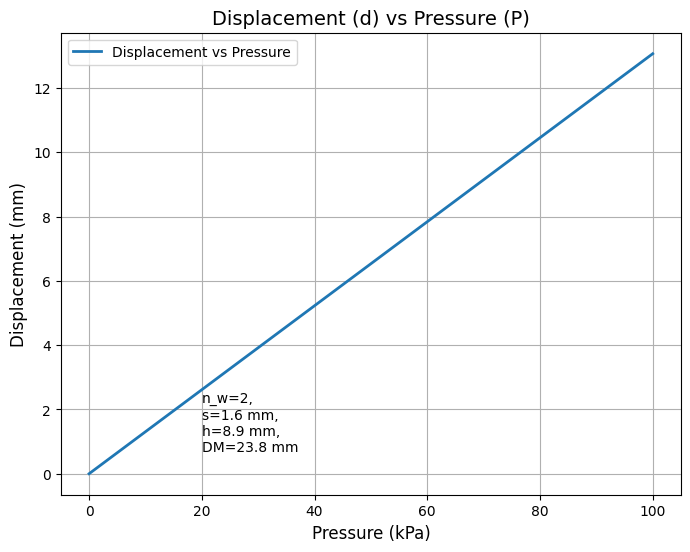

In [9]:
# Calculate displacements for a specific configuration of a linear actuator for each pressure value
displacements = displacement(pressure_values, corrugation_numbers[0], wall_thicknesses [0], corrugation_heights[0],mean_diameters[0])
print(displacements)
print(pressure_values)
# Plotting the displacement d(P)
plt.figure(figsize=(8, 6))

plt.plot(pressure_values / 1e3, displacements, 
             label='Displacement vs Pressure',
             linewidth=2)

# Plotting the constants
plt.text(20, 0.6,
            f'n_w={corrugation_numbers[0]},\ns={wall_thicknesses[0]*1000} mm,\nh={corrugation_heights[0]*1000} mm,\nDM={mean_diameters[0]*1000} mm', 
            fontsize=10, verticalalignment='bottom', horizontalalignment='left')

plt.title('Displacement (d) vs Pressure (P)', fontsize=14)
plt.xlabel('Pressure (kPa)', fontsize=12)
plt.ylabel('Displacement (mm)', fontsize=12)
plt.grid(True)
plt.legend()
plt.savefig("d-p-fixed-variables.png")
plt.show()

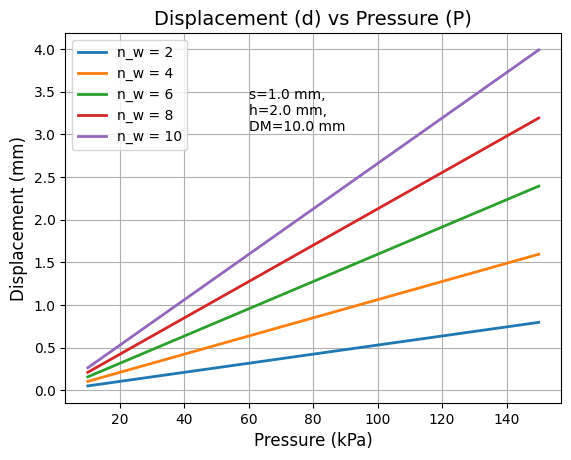

In [5]:
# Calculate displacements for different corrugation_numbers for each pressure value
for n_w in corrugation_numbers:
    displacements = displacement(pressure_values, n_w, wall_thicknesses [1], corrugation_heights[0],mean_diameters[0])
    plt.plot(pressure_values / 1e3, displacements, label=f'n_w = {n_w}', linewidth=2)

plt.text(60, 3,
           f'\ns={wall_thicknesses[1]*1000} mm,\nh={corrugation_heights[0]*1000} mm,\nDM={mean_diameters[0]*1000} mm', 
          fontsize=10, verticalalignment='bottom', horizontalalignment='left')

plt.title('Displacement (d) vs Pressure (P)', fontsize=14)
plt.xlabel('Pressure (kPa)', fontsize=12)
plt.ylabel('Displacement (mm)', fontsize=12)
plt.grid(True)
plt.legend()
plt.savefig("d-p-corrugation-numbers-varying.png")
plt.show()



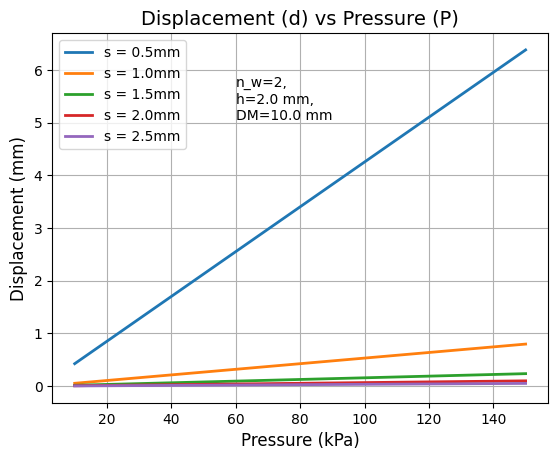

In [6]:
# Calculate displacements for different wall thicknesses for each pressure value

for s in wall_thicknesses:
    displacements = displacement(pressure_values, corrugation_numbers[0], s, corrugation_heights[0],mean_diameters[0])
    plt.plot(pressure_values / 1e3, displacements, label=f's = {s*1000}mm', linewidth=2)

plt.text(60, 5,
           f'\nn_w={corrugation_numbers[0]},\nh={corrugation_heights[0]*1000} mm,\nDM={mean_diameters[0]*1000} mm', 
          fontsize=10, verticalalignment='bottom', horizontalalignment='left')

plt.title('Displacement (d) vs Pressure (P)', fontsize=14)
plt.xlabel('Pressure (kPa)', fontsize=12)
plt.ylabel('Displacement (mm)', fontsize=12)
plt.grid(True)
plt.legend()
plt.savefig("d-p-thickness-varying.png")
plt.show()


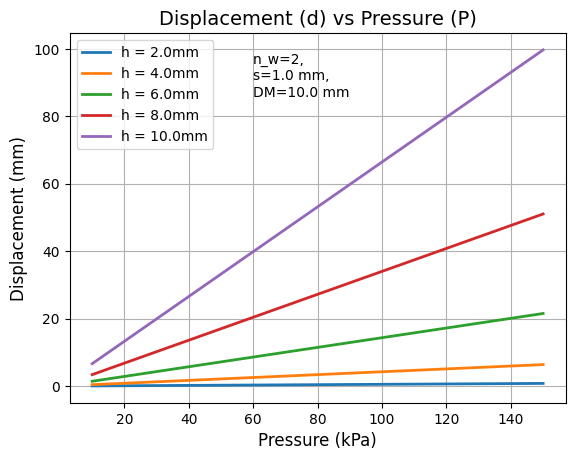

In [7]:
# Calculate displacements for different corrugation heights for each pressure value

for h in corrugation_heights:
    displacements = displacement(pressure_values, corrugation_numbers[0], wall_thicknesses[1], h, mean_diameters[0])
    plt.plot(pressure_values / 1e3, displacements, label=f'h = {h*1000}mm', linewidth=2)

plt.text(60, 85,
           f'\nn_w={corrugation_numbers[0]},\ns={wall_thicknesses[1]*1000} mm,\nDM={mean_diameters[0]*1000} mm', 
          fontsize=10, verticalalignment='bottom', horizontalalignment='left')

plt.title('Displacement (d) vs Pressure (P)', fontsize=14)
plt.xlabel('Pressure (kPa)', fontsize=12)
plt.ylabel('Displacement (mm)', fontsize=12)
plt.grid(True)
plt.legend()
plt.savefig("d-p-corrugation-height-varying.png")
plt.show()


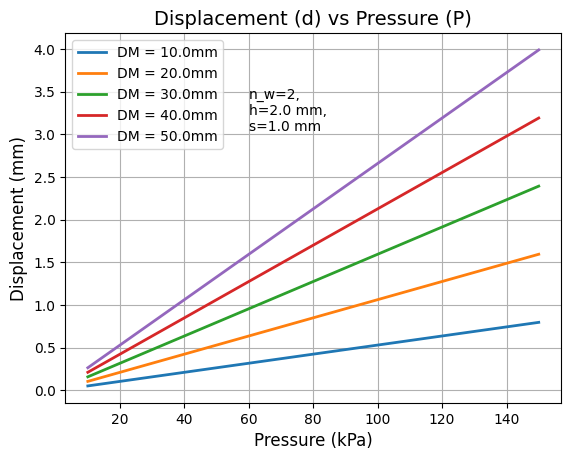

In [7]:
# Calculate displacements for different mean diameters for each pressure value

for DM in mean_diameters:
    
    displacements = displacement(pressure_values, corrugation_numbers[0], wall_thicknesses[1], corrugation_heights[0], DM)
    plt.plot(pressure_values / 1e3, displacements, label=f'DM = {DM*1000}mm', linewidth=2)

plt.text(60, 3,
           f'\nn_w={corrugation_numbers[0]},\nh={corrugation_heights[0]*1000} mm,\ns={wall_thicknesses[1]*1000} mm', 
          fontsize=10, verticalalignment='bottom', horizontalalignment='left')

plt.title('Displacement (d) vs Pressure (P)', fontsize=14)
plt.xlabel('Pressure (kPa)', fontsize=12)
plt.ylabel('Displacement (mm)', fontsize=12)
plt.grid(True)
plt.legend()
plt.savefig("d-p-diameter-varying.png")
plt.show()
